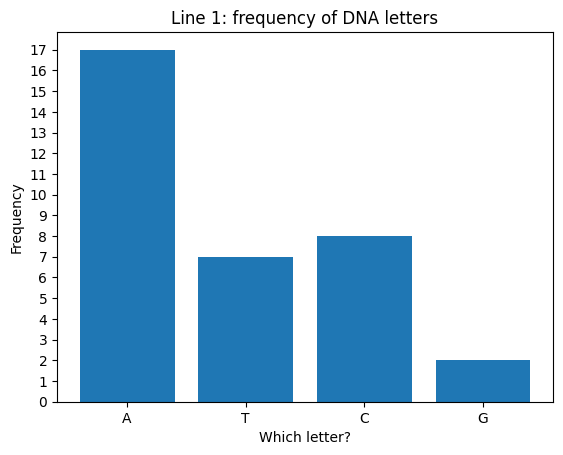

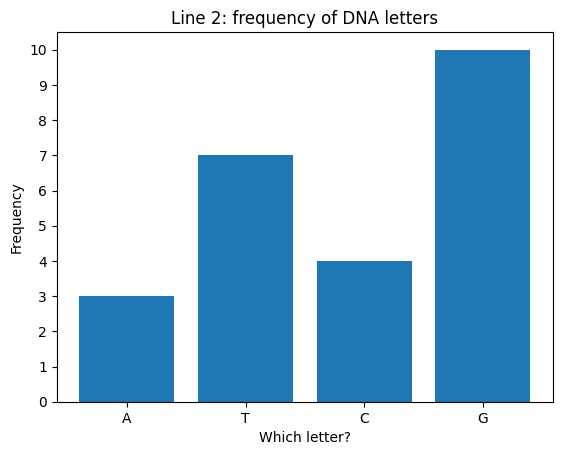

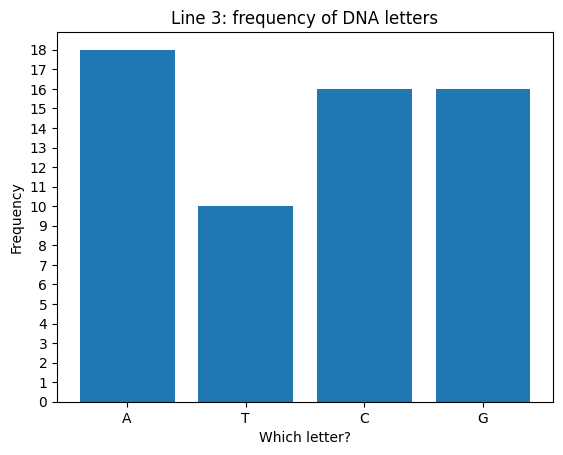

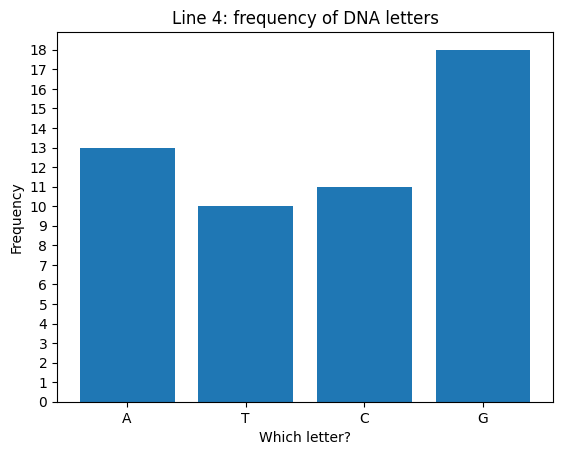

In [ ]:
'''  
The following code reads letters from a file which contains raw data from a string of DNA. 
For help I've had Google Gemini, which have never given me answers but always challenged me in 
developing thought patterns... as well as tips and tricks on how to do things.
It has been a memorable and good experience and one that marks the beginning of
my data engineering journey.
'''

from collections import Counter
import matplotlib.pyplot as plt

letters_to_count = ["A", "T", "C", "G"] # I create this to compare to the file to this list (in the if-statement)
list_of_dictionarys = []

with open("data/dna_raw.txt", "r") as file:
    for index, line in enumerate(file): # I recreate the file as an enumerate that can return both index and line
        if index % 2 == 1: # We check if the index is odd/uneven, which means we'll it's one of the string of letters. It's not the best solution in my opinion, since it's not as modular as some other solutions. But it works here.
            line = line.strip().upper()
            letter_count = {char: count for char, count in Counter(line).items() if char in letters_to_count} # Dictionary comprehension is an efficient way to create dictionaries, which I do here
            list_of_dictionarys.append(letter_count)

# We loop through each dict in the list_of_dictionarys to find the specified letters. The get()-function is very handy here, as it returns the number of times the specified letter appears in the dct we are at in the current iteration. 
for i, dct in enumerate(list_of_dictionarys, start=1): # We specify to start from 1, which is more natural in a human context
    letters = ["A", "T", "C", "G"]
    frequencies = [
        dct.get("A", 0), # The "dct" represents the dictionary, the "i" represents the index in list_of_dictionarys
        dct.get("T", 0),
        dct.get("C", 0),
        dct.get("G", 0)
    ]

    # Syntax for matplotlib, is run in the loop to get a graph for each sequence
    plt.figure()
    plt.bar(letters, frequencies)
    plt.title(f"Line {i}: frequency of DNA letters")
    plt.xlabel("Which letter?")
    plt.ylabel("Frequency")
    max_value = max(frequencies)
    plt.yticks(range(0, max_value + 1, 1))
    plt.show()





    

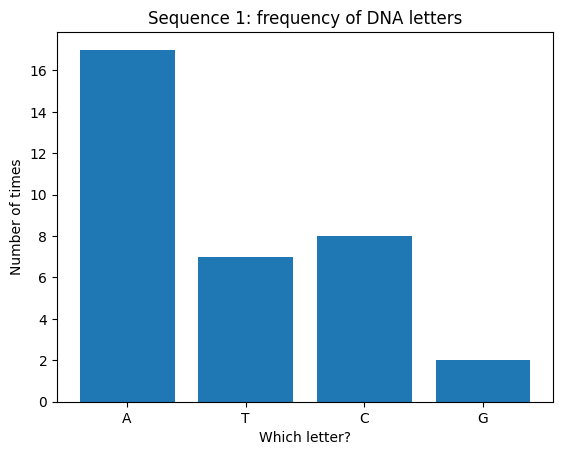

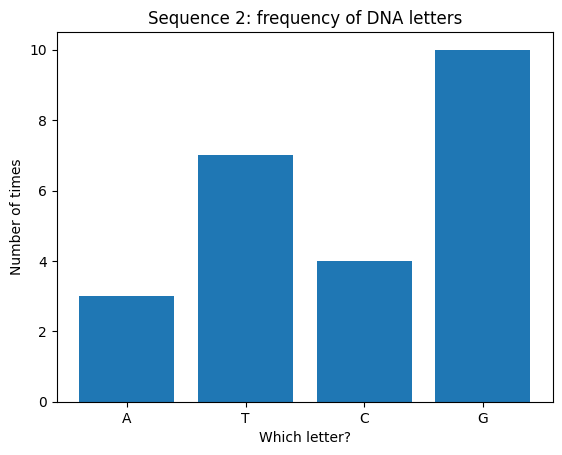

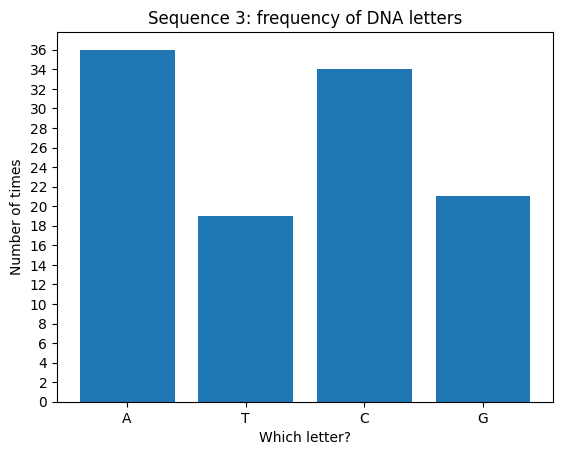

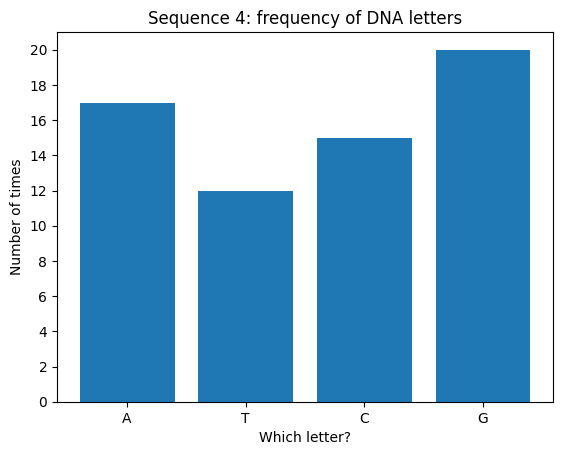

18

In [ ]:
def visualize_extracted_data(file_path):
    import matplotlib.pyplot as plt

    letters_to_count = {"A", "T", "C", "G"} # I create this to compare to the file to this list (in the if-statement)
    list_of_sequences = [] # This list will contain each sequence
    current_sequence = [] # A kind of temporary list that will check if we are on the current sequence

    with open(file_path, "r") as file: # we open the file from the argument in the function. "r" stands for read, as we are reading (not writing) from the file
        for line in file: # self explanatory
            line = line.strip().upper() # self explanatory

            if line.startswith(">"): # If a line starts with ">", this is true, and the indented code will be execvated
                if current_sequence: # If "current_sequence" contains anything, the indented code will be execvated
                    list_of_sequences.append(current_sequence) # adding it to list_of_sequences
                current_sequence = [] # empty the list/start from zero
            else:
                current_sequence.append(line) # If the line DOES NOT start with ">", we add the full line (which is stripped and converted to CAPS) to current_sequence
        
        if current_sequence:
            list_of_sequences.append(current_sequence) # If we would not have this, the last line of code wouldnt be execvated

    for seq_index, sequence in enumerate(list_of_sequences, start=1): # This loop plots every graph
        full_sequence = ''.join(sequence)

        letter_count = {char: full_sequence.count(char) for char in letters_to_count} # Skapar en dictionary "bokstaven (char)" som nyckel och mängden i full_sequence

        letters = ["A", "T", "C", "G"] # Here we create a list with the letters that will be extracted from raw_data-complicated
        frequencies = [letter_count[letter] for letter in letters] # List comprehension that looks for the letters above

        # The following code is matplotlib syntax
        plt.figure() 
        plt.bar(letters, frequencies)
        plt.title(f"Sequence {seq_index}: frequency of DNA letters")
        plt.xlabel("Which letter?")
        plt.ylabel("Number of times")
        plt.yticks(range(0, max(frequencies) + 1, 2)) # This decides where the y-axis starts, ends and how many "jumps" it takes each time
        plt.show()
    
visualize_extracted_data("data/dna_raw_complicated.txt")